In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())

import pickle
from testsuite.utilities import Pareto_split
import numpy as np
from testsuite.analysis import load_all, plot_all_pareto_3d, PLOT_STYLE, plot_measure
import matplotlib.pyplot as plt

In [2]:
dir_path = os.getcwd()
result_dirs = sorted(os.listdir("./log_data/"))

In [3]:
results = [load_all(os.path.join(dir_path, "log_data/", result_dir)) for result_dir in result_dirs]
names = [result_dir.split("_")[2] for result_dir in result_dirs] 
for i, name, result_dir in zip(range(len(names)), result_dirs, names):
    if "ei" in  name:
        names[i]+="_ei"
    elif "mean" in name:
        names[i]+="_$\mu$"
    else:
        pass
    a=12
    print(names[i], "\t\t", result_dirs[i])

Mpoi 		 test_function_Mpoi_init10_MultiSurrogate_Mpoi
ParEgo 		 test_function_ParEgo_init10
Saf_ei 		 test_function_Saf_init10_MultiSurrogate_ei
Saf_$\mu$ 		 test_function_Saf_init10_MultiSurrogate_mean
SmsEgo_ei 		 test_function_SmsEgo_init10_MultiSurrogate_ei
SmsEgo_$\mu$ 		 test_function_SmsEgo_init10_MultiSurrogate_mean
lhs 		 test_function_lhs_init10


In [4]:
from paralellizer import func, n_obj, test_function, x_limits, n_dim, n_obj

In [5]:
def scatter_nsphere(n_points, n_dims, weighting=None):
    """scatter n_points onto unit n-spere with n_dims dimensions"""
    if weighting is None:
        weighting = np.ones(n_dims)
    else:
        weighting = np.array(weighting)
    points = np.random.randn(n_points,n_dims)*weighting
    d = (points**2).sum(axis=1)**0.5
    norm_points = (points.T/d.T).T
    return np.abs(norm_points)

In [6]:
weighting = np.arange(1,n_obj+1)*2
y = scatter_nsphere(500, n_obj, weighting)

In [7]:
print("weighting:\t", weighting)
print("n_obj:\t\t", n_obj)
print("n_dim:\t\t", n_dim)

weighting:	 [2 4 6]
n_obj:		 3
n_dim:		 8


In [8]:
from pymoo.factory import get_performance_indicator
def extract_performance(z, indicator):
    ANS  = []
    for i in range(9, len(z)):
        p = Pareto_split(z[:i])[0]
        ans = indicator.calc(p)
        ANS.append(ans)

    return ANS

In [9]:
igdp = get_performance_indicator("igd+", y)
ref = np.ones(n_obj)*1.2
hv = get_performance_indicator("hv", ref_point=ref)

In [ ]:
for result in results:
    ys_adjusted = [y/weighting for y in result["y"] if type(y) is np.ndarray]
    print(np.shape(ys_adjusted))
    result["igd"] = [extract_performance(y, igdp) for y in ys_adjusted]
    result["hpv"] = [extract_performance(y, hv) for y in ys_adjusted]

lhs_ind = int(np.where([np.shape(result["hpv"]) == (0,) for result in results])[0])
print("lhs index: \t", lhs_ind)

(11, 250, 3)

Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False

(11, 250, 3)
(11, 250, 3)
(9, 250, 3)


In [11]:
results[lhs_ind]["hpv"] = [[hv.calc(Pareto_split(y/weighting)[0]) for y in ys] for ys in results[lhs_ind]["y"]]
results[lhs_ind]["igd"] = [[igdp.calc(Pareto_split(y/weighting)[0]) for y in ys] for ys in results[lhs_ind]["y"]]

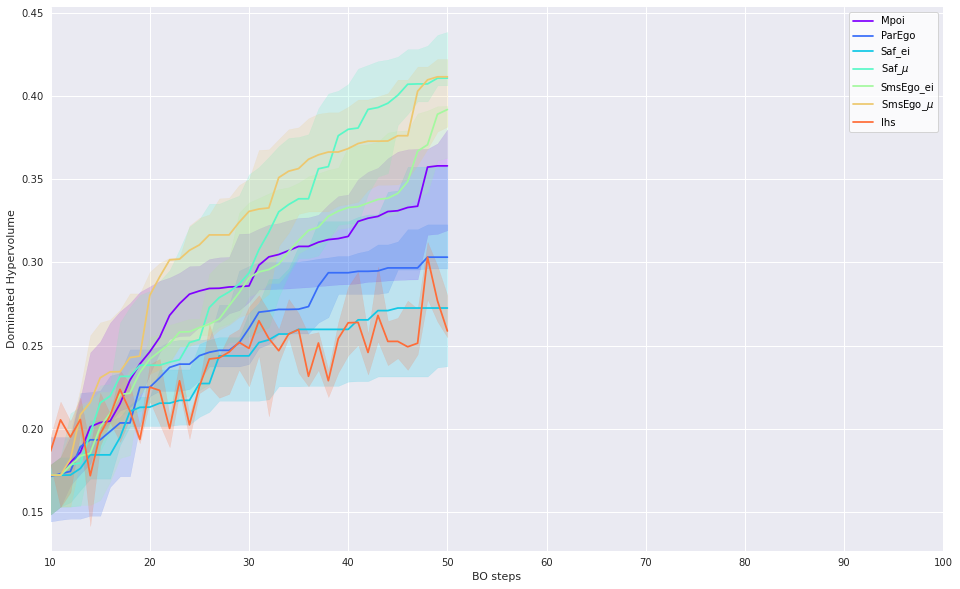

In [12]:
with plt.style.context(PLOT_STYLE["plot_style"]):
    fig_hv = plt.figure(figsize=[16, 10])
    ax_hv = fig_hv.gca()

cmap = PLOT_STYLE['plot_cmap']
colors = cmap(np.linspace(0, 1, len(result_dirs)+1))

for result, name, color in zip(results, names, colors):
    plot_measure(result, measure="hpv", axis=ax_hv, plot_individuals=False, label=name, color=color)
ax_hv.set_xlim([10, 100])
ax_hv.set_xlabel("BO steps")
ax_hv.set_ylabel("Dominated Hypervolume")
ax_hv.legend()

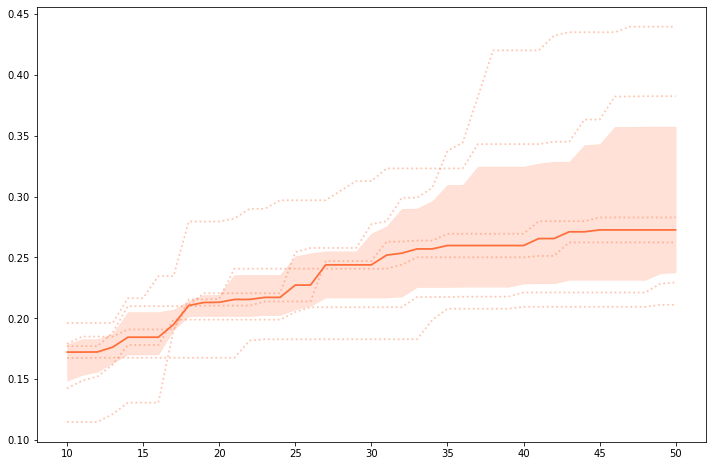

In [16]:
plot_measure(results[2], measure="hpv", axis=None, plot_individuals=True, label=name, color=color)

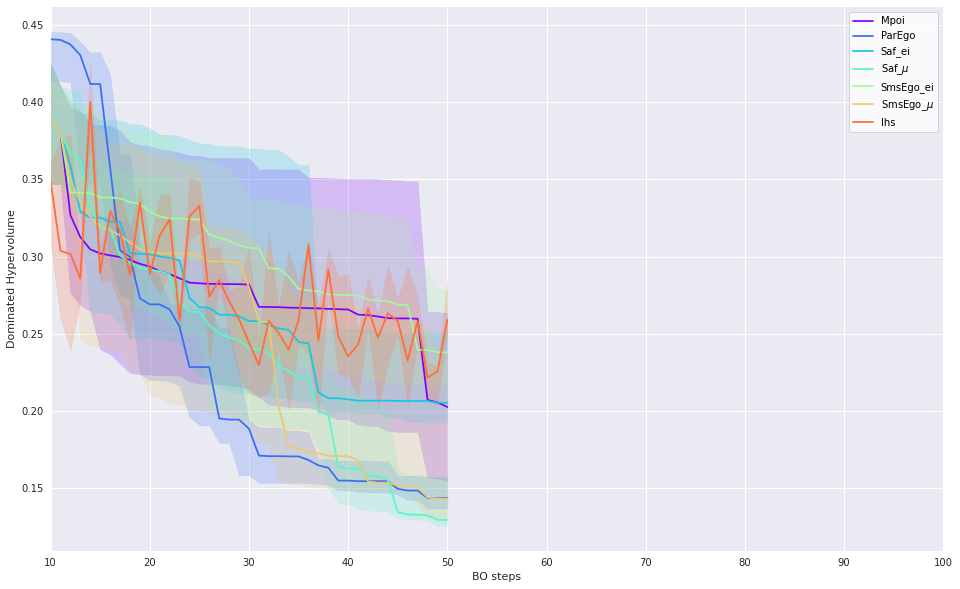

In [13]:
with plt.style.context(PLOT_STYLE["plot_style"]):
    fig_igd = plt.figure(figsize=[16, 10])
    ax_igd = fig_igd.gca()

cmap = PLOT_STYLE['plot_cmap']
colors = cmap(np.linspace(0, 1, len(result_dirs)+1))

for result, name, color in zip(results, names, colors):
    plot_measure(result, measure="igd", axis=ax_igd, plot_individuals=False, label=name, color=color)
ax_igd.set_xlim([10, 100])
ax_igd.set_xlabel("BO steps")
ax_igd.set_ylabel("Dominated Hypervolume")
ax_igd.legend()

In [14]:
print(np.sum([len(errors) for errors in safsaf_results["errors"]]), "\t",*[errors for errors in safsaf_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in safsms_results["errors"]]), "\t",*[errors for errors in safsms_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in saf_ei_results["errors"]]), "\t",*[errors for errors in saf_ei_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in saf_mu_results["errors"]]), "\t",*[errors for errors in saf_mu_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in sms_ei_results["errors"]]), "\t",*[errors for errors in sms_ei_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in sms_mu_results["errors"]]), "\t",*[errors for errors in sms_mu_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in smssaf_results["errors"]]), "\t",*[errors for errors in smssaf_results["errors"] if len(errors)>0])

NameError: name 'safsaf_results' is not defined

In [ ]:
# np.save("./pkl_results/safsaf_results.pkl", safsaf_results) 
# np.save("./pkl_results/safsms_results.pkl", safsms_results) 
# np.save("./pkl_results/saf_ei_results.pkl", saf_ei_results) 
# np.save("./pkl_results/saf_mu_results.pkl", saf_mu_results) 
# np.save("./pkl_results/sms_ei_results.pkl", sms_ei_results) 
# np.save("./pkl_results/sms_mu_results.pkl", sms_mu_results) 
# np.save("./pkl_results/smssaf_results.pkl", smssaf_results) 

In [ ]:
plt.hist(y[:,1], 100)

In [ ]:
def scatter_nsphere(n_points, n_dims):
    """scatter n_points onto unit n-spere with n_dims dimensions"""
    points = np.random.randn(n_points,n_dims) 
    d = (points**2).sum(axis=1)**0.5
    norm_points = (points.T/d.T).T
    return np.abs(norm_points) 

In [ ]:
len(y)

In [ ]:
pn = scatter_nsphere(500, 5)

In [ ]:
pn.shape

In [ ]:
plt.hist(pn[:,1], 100);